<a href="https://colab.research.google.com/github/bonareri/Machine-Learning/blob/main/Disney_land_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the packages

In [7]:
#importing libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

## Getting the dataset

In [5]:
#loading data
df = pd.read_csv("/content/DisneylandReviews.csv", encoding = "latin1")
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [9]:
# Creating a dataframe with review title as the column
disney = pd.DataFrame(df['Review_Text'])
disney.head()

,Review_Text
0,If you've ever been to Disneyland anywhere you...
1,Its been a while since d last time we visit HK...
2,Thanks God it wasn t too hot or too humid wh...
3,HK Disneyland is a great compact park. Unfortu...
4,"the location is not in the city, took around 1..."


## Preprocessing

### 1. Lowercasing

In [10]:
# Ensure every value in the disney dataset is lowercase
disney['Review_Text'] = disney['Review_Text'].str.lower()
disney.head()

,Review_Text
0,if you've ever been to disneyland anywhere you...
1,its been a while since d last time we visit hk...
2,thanks god it wasn t too hot or too humid wh...
3,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1..."


### 2. Remove Punctuation

In [11]:
# Remove every punctuation in the disney dataset
disney['Review_Text'] = disney['Review_Text'].str.replace('[^\w\s]','')
disney.head()

,Review_Text
0,if you've ever been to disneyland anywhere you...
1,its been a while since d last time we visit hk...
2,thanks god it wasn t too hot or too humid wh...
3,hk disneyland is a great compact park. unfortu...
4,"the location is not in the city, took around 1..."


### 3. Tokenization

In [12]:
nltk.download('punkt')

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
from nltk.tokenize import wordpunct_tokenize, word_tokenize

disney['Review_Text'] = disney['Review_Text'].astype(str)
disney['Review_Text'] = disney['Review_Text'].apply(lambda x: word_tokenize(x))
disney.head()

,Review_Text
0,"[if, you, 've, ever, been, to, disneyland, any..."
1,"[its, been, a, while, since, d, last, time, we..."
2,"[thanks, god, it, wasn, t, too, hot, or, too, ..."
3,"[hk, disneyland, is, a, great, compact, park, ..."
4,"[the, location, is, not, in, the, city, ,, too..."


### 4. Stopwords Removal

In [15]:
#Removing stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
disney['Review_Text'] = disney['Review_Text'].apply(lambda x: " ".join(x for x in x if x not in stop))
disney.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review_Text
0,'ve ever disneyland anywhere 'll find disneyla...
1,"since last time visit hk disneyland .. yet , t..."
2,thanks god hot humid visiting park otherwise w...
3,hk disneyland great compact park . unfortunate...
4,"location city , took around 1 hour kowlon , ki..."


### 5. Lemmatization

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [17]:
#Applying lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
disney['Review_Text'] = disney['Review_Text'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
disney.head()

,Review_Text
0,'ve ever disneyland anywhere 'll find disneyla...
1,"since last time visit hk disneyland .. yet , t..."
2,thanks god hot humid visiting park otherwise w...
3,hk disneyland great compact park . unfortunate...
4,"location city , took around 1 hour kowlon , ki..."


### 6. Using VADER
A lexicon for sentiment analysis (used in sentiment analysis tasks).


In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
# Applying Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
disney['scores'] = disney['Review_Text'].apply(lambda review: sid.polarity_scores(review))
disney.head()

,Review_Text,scores
0,'ve ever disneyland anywhere 'll find disneyla...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp..."
1,"since last time visit hk disneyland .. yet , t...","{'neg': 0.063, 'neu': 0.648, 'pos': 0.289, 'co..."
2,thanks god hot humid visiting park otherwise w...,"{'neg': 0.054, 'neu': 0.624, 'pos': 0.322, 'co..."
3,hk disneyland great compact park . unfortunate...,"{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co..."
4,"location city , took around 1 hour kowlon , ki...","{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp..."


In [20]:
# Applying Vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Review_Text' column
disney['scores'] = disney['Review_Text'].apply(lambda review: sid.polarity_scores(review))

# Extract the compound score from the 'scores' column
disney['compound'] = disney['scores'].apply(lambda score_dict: score_dict['compound'])

# Classify sentiment as 'positive' or 'negative' based on the compound score
disney['comp_score'] = disney['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')

disney.head()

,Review_Text,scores,compound,comp_score
0,'ve ever disneyland anywhere 'll find disneyla...,"{'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...",0.8054,positive
1,"since last time visit hk disneyland .. yet , t...","{'neg': 0.063, 'neu': 0.648, 'pos': 0.289, 'co...",0.9857,positive
2,thanks god hot humid visiting park otherwise w...,"{'neg': 0.054, 'neu': 0.624, 'pos': 0.322, 'co...",0.9825,positive
3,hk disneyland great compact park . unfortunate...,"{'neg': 0.102, 'neu': 0.628, 'pos': 0.271, 'co...",0.8739,positive
4,"location city , took around 1 hour kowlon , ki...","{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.5106,positive


### Bar Plot Of Sentiment Analysis

<ipython-input-22-90220c65ed58>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


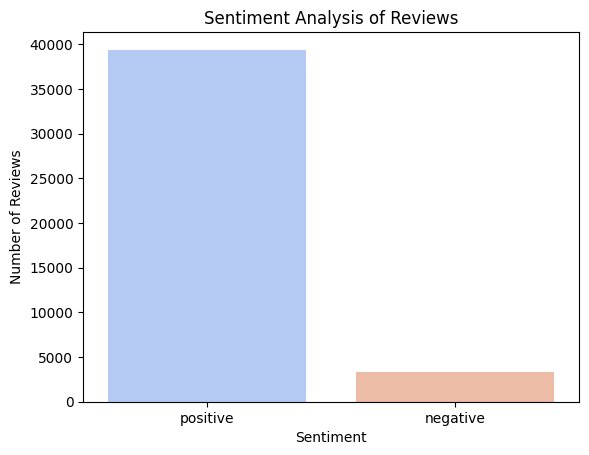

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

#Count the number of positive and negative reviews
sentiment_counts = disney['comp_score'].value_counts()

#Plot a bar graph
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

### Pie Chart Of Sentiment Distribution

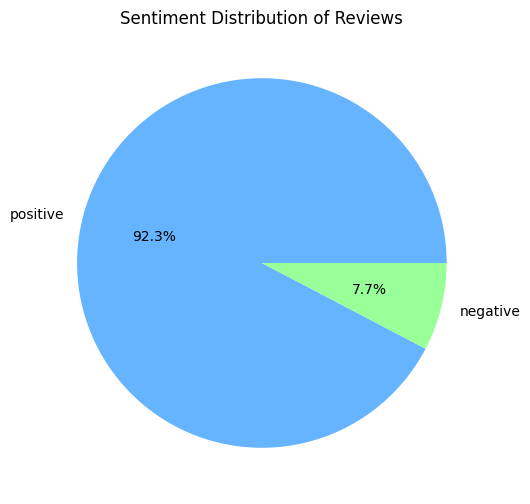

In [23]:
plt.figure(figsize=(6, 6))
disney['comp_score'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff6666'])
plt.title('Sentiment Distribution of Reviews')
plt.ylabel('')
plt.show()

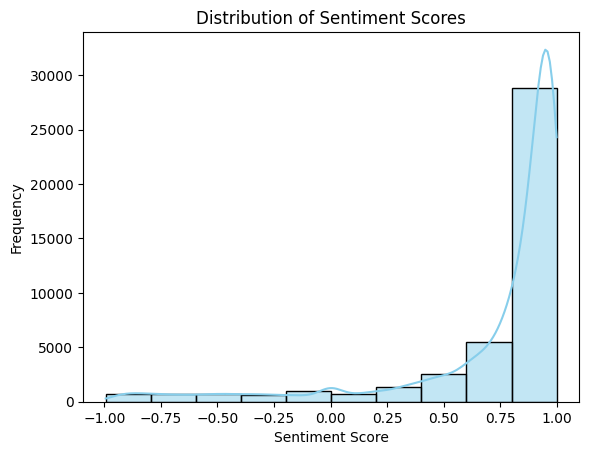

In [25]:
sns.histplot(disney['compound'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

In [26]:
from wordcloud import WordCloud

In [29]:
text = " ".join(review for review in disney.Review_Text)

(-0.5, 799.5, 399.5, -0.5)

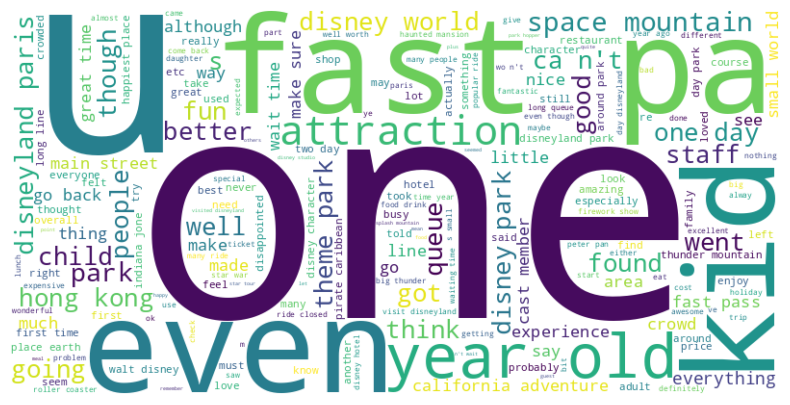

In [30]:
#Applying word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')